# Importation des modules

In [2]:
import matplotlib.pyplot as plt
import numpy as np

import pandas as pd
import seaborn as sns

from scipy.stats import f_oneway, kruskal

## 1. Variables catégorielles et variables continues

In [3]:
dataset = pd.read_csv("dataset.csv")

In [4]:
df_categories = dataset.iloc[:, [1,3,4,5]]
df_continues = dataset.iloc[:, [0,2,6]]

In [5]:
# dataframe contenant les variables catégorielles
df_categories

,sex,children,smoker,region
0,female,0,yes,southwest
1,male,1,no,southeast
2,male,3,no,southeast
3,male,0,no,northwest
4,male,0,no,northwest
...,...,...,...,...
1333,male,3,no,northwest
1334,female,0,no,northeast
1335,female,0,no,southeast
1336,female,0,no,southwest


In [6]:
# dataframe contenant les variables continues
df_continues

,age,bmi,charges
0,19,27.900,16884.92400
1,18,33.770,1725.55230
2,28,33.000,4449.46200
3,33,22.705,21984.47061
4,32,28.880,3866.85520
...,...,...,...
1333,50,30.970,10600.54830
1334,18,31.920,2205.98080
1335,18,36.850,1629.83350
1336,21,25.800,2007.94500


In [7]:
# on génère un tableau de synthèse statistique
df_continues.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


## 2. Analyse univariée

### 2.1. Diagramme en boîte (Boxplot) et statistiques de base

On réalise des boxplot pour visualiser la dispersion et les valeurs éventuellement aberrantes.

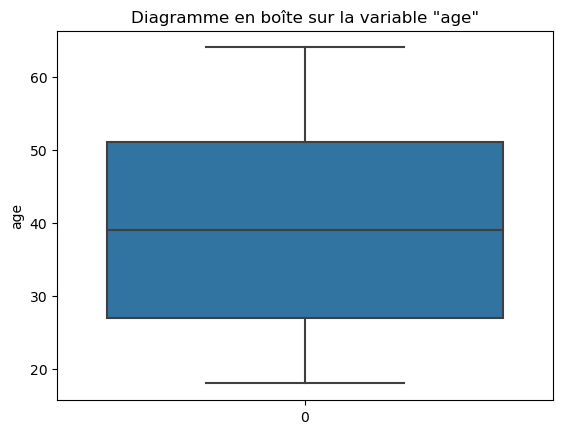

Minimum : 18
Q1 : 27.0
Médiane : 39.0
Q3: 51.0
Maximum : 64

valeurs atypiques < Q1-1.5*IQR) | > Q3+1.5*IQR :

Series([], Name: age, dtype: int64)


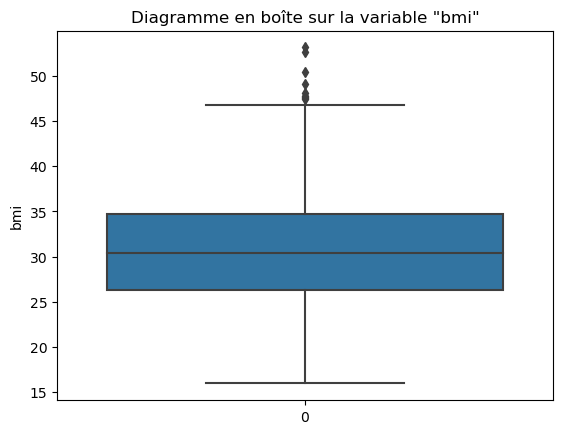

Minimum : 15.96
Q1 : 26.3
Médiane : 30.4
Q3: 34.69
Maximum : 53.13

valeurs atypiques < Q1-1.5*IQR) | > Q3+1.5*IQR :

116     49.06
286     48.07
401     47.52
543     47.41
847     50.38
860     47.60
1047    52.58
1088    47.74
1317    53.13
Name: bmi, dtype: float64


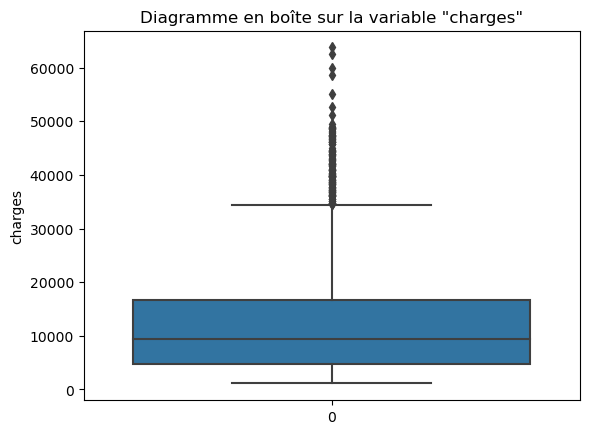

Minimum : 1121.87
Q1 : 4740.29
Médiane : 9382.03
Q3: 16639.91
Maximum : 63770.43

valeurs atypiques < Q1-1.5*IQR) | > Q3+1.5*IQR :

14      39611.75770
19      36837.46700
23      37701.87680
29      38711.00000
30      35585.57600
           ...     
1300    62592.87309
1301    46718.16325
1303    37829.72420
1313    36397.57600
1323    43896.37630
Name: charges, Length: 139, dtype: float64


In [8]:
liste_colonnes = list(df_continues.columns)

for var in liste_colonnes:

    # Sélection de la variable à tracer
    variable = df_continues[var]
    
    # Titre et axe
    plt.title(f'Diagramme en boîte sur la variable "{var}"')
    plt.ylabel(f"{var}")

    # Tracé du boxplot
    sns.boxplot(variable)
    plt.show()
    
    # Minimum et Maximum
    minimum = round(variable.min(),2)
    maximum = round(variable.max(),2)

    # Calcul des quartiles et médiane
    mediane = round(variable.median(),2)
    q1, q3 = round(variable.quantile([0.25, 0.75]),2)
    
    # Calcul de l'intervalle interquartile (IQR)
    iqr = q3 - q1
    
    # Détermination des bornes des outliers
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    # Sélection des valeurs aberrantes
    outliers = variable[(variable < lower_bound) | (variable > upper_bound)]

    # Affichage des indicateurs
    print(f"Minimum : {minimum}")
    print(f"Q1 : {q1}")
    print(f"Médiane : {mediane}")
    print(f"Q3: {q3}")
    print(f"Maximum : {maximum}\n")

    # Affichage des valeurs aberrantes
    print("valeurs atypiques < Q1-1.5*IQR) | > Q3+1.5*IQR :\n")
    print(outliers)

### 2.2. Histogrammes et transformations logarithmiques

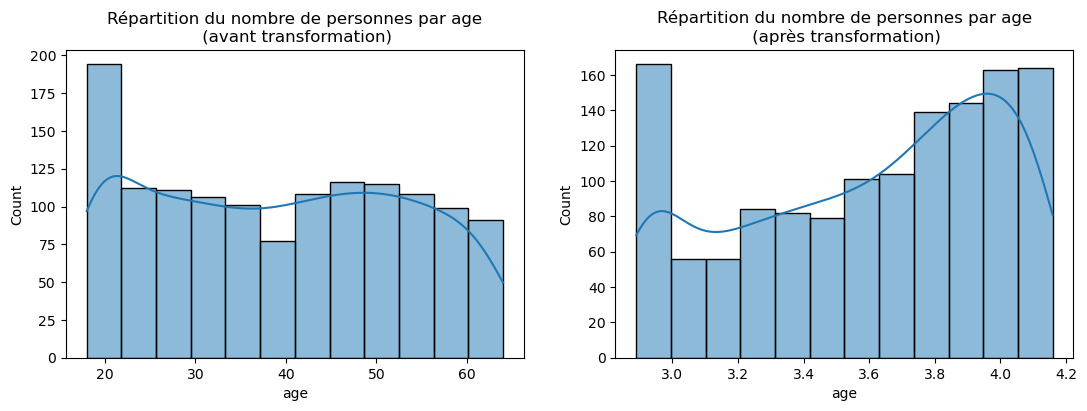

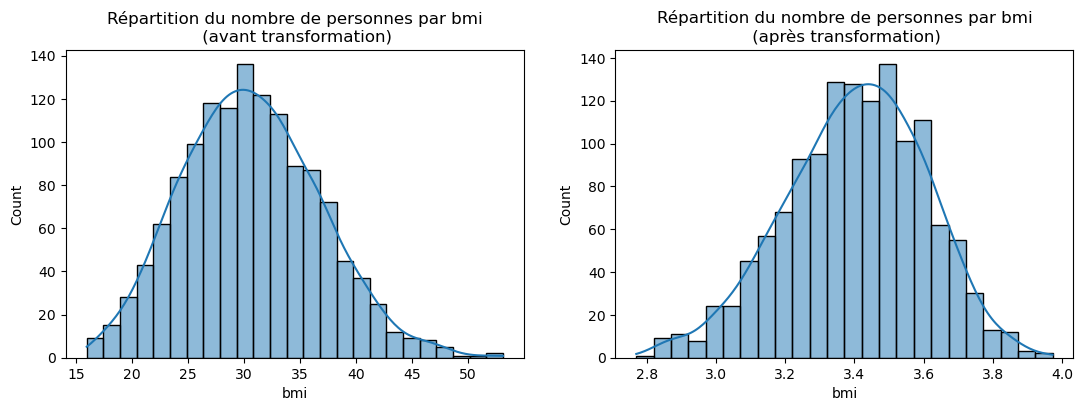

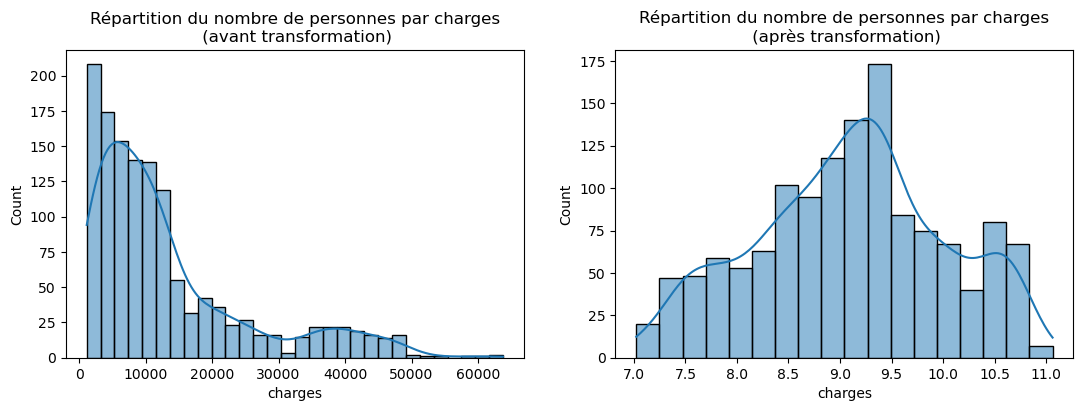

In [9]:
df_log = np.log(df_continues)
liste_col = list(df_continues.columns)

for col in liste_col:
    # Création de la figure et des subplots
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(13, 4))

    # Premier histogramme
    sns.histplot(data=df_continues, x=col, ax=ax1, kde=True)
    ax1.set_title(f"Répartition du nombre de personnes par {col}\n (avant transformation)")

    # Second histogramme
    sns.histplot(data=df_log, x=col, ax=ax2, kde=True)
    ax2.set_title(f"Répartition du nombre de personnes par {col}\n (après transformation)")

    # Affichage de la figure
    plt.show()

  

Seule la variable "bmi" suit une distribution normale.

## 3. Corrélation et analyses bivariées

### 3.1. Etude de la corrélation des variables avec la variable cible

              age   charges
age      1.000000  0.299008
charges  0.299008  1.000000


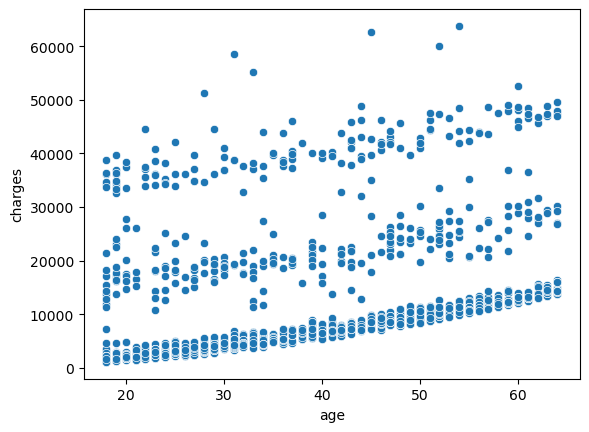

In [10]:
# Sélection de la colonne "age" et de la variable cible
data = df_continues[["age", "charges"]]

# Calcul de la corrélation
corr = data.corr()
print(corr)

# Affichage du scatterplot
sns.scatterplot(x="age", y="charges", data=data)
plt.show()


Il y a donc une faible corrélation positive entre les deux variables.

          age       bmi
age  1.000000  0.109272
bmi  0.109272  1.000000


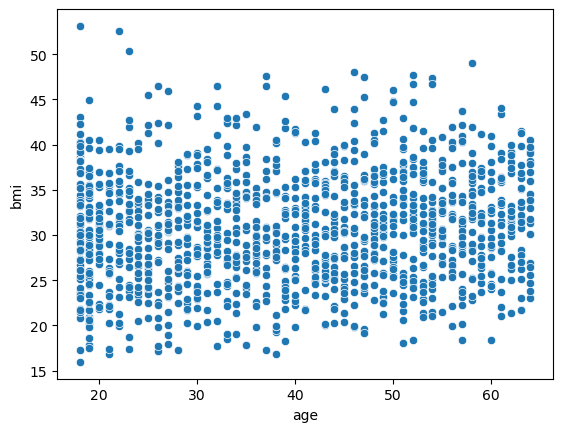

In [11]:
data = df_continues[["age", "bmi"]]

# Calcul de la corrélation
corr = data.corr()
print(corr)

# Affichage de l'histogramme
sns.scatterplot(x="age", y="bmi", data=data)
plt.show()


Il y a donc une très faible corrélation positive entre les deux variables. 

              bmi   charges
bmi      1.000000  0.198341
charges  0.198341  1.000000


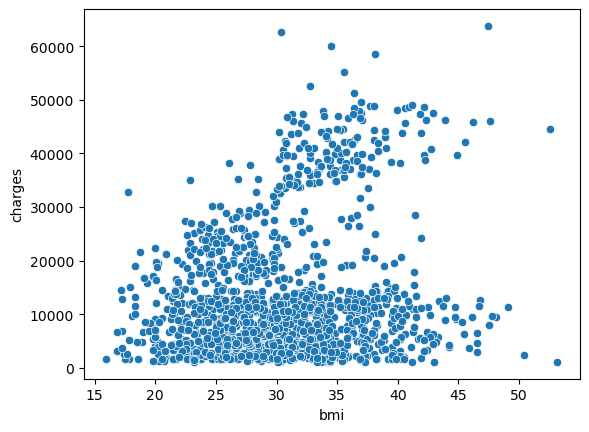

In [12]:
data = df_continues[["bmi", "charges"]]

# Calcul de la corrélation
corr = data.corr()
print(corr)

# Affichage de l'histogramme
sns.scatterplot(x="bmi", y="charges", data=data)
plt.show()


Il y a donc une faible corrélation positive entre les deux variables.

### 3.2. Analyses bivariées 

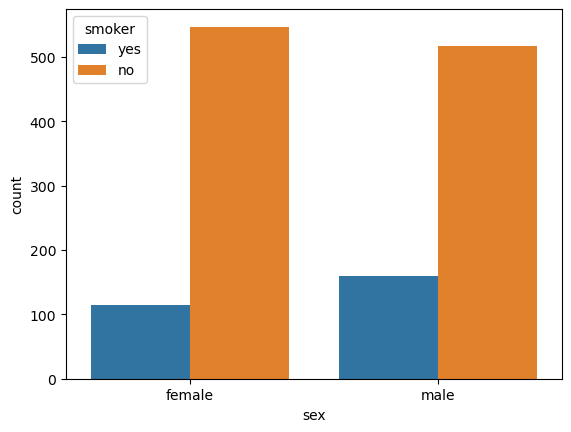

In [13]:
# Sélection des colonnes "sex" et "smoker"
data = df_categories[["sex", "smoker"]]

# Affichage du graphique
sns.countplot(x="sex", hue="smoker", data=data)
plt.show()

La plupart des hommes et des femmes ne sont pas fumeurs. On peut regarder si les charges dépendent du statut fumeur ou non.

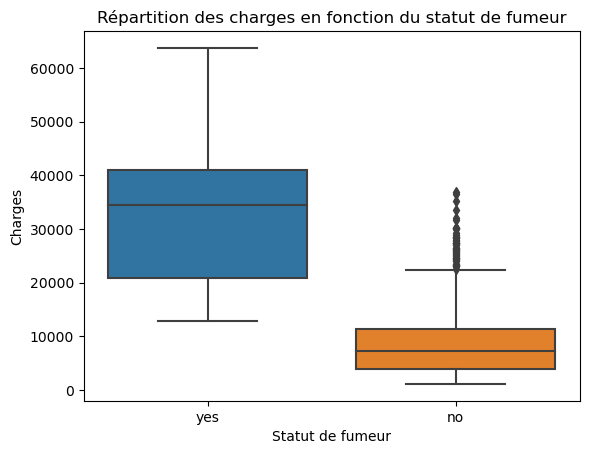

In [14]:
sns.boxplot(x='smoker', y='charges', data=dataset)

plt.title('Répartition des charges en fonction du statut de fumeur')
plt.xlabel('Statut de fumeur')
plt.ylabel('Charges')

plt.show()

Le boxplot indique que le statut "fumeur ou non" impacte fortement le montant des "charges". Par exemple, 75% des charges des fumeurs sont supérieures à 10000, alors que 75% des charges des non-fumeurs sont inférieures à 10000.

On regarde maintenant, si l'âge influe sur le montant des charges.

Boxplot des charges en fonction de l'âge

              age   charges
age      1.000000  0.299008
charges  0.299008  1.000000


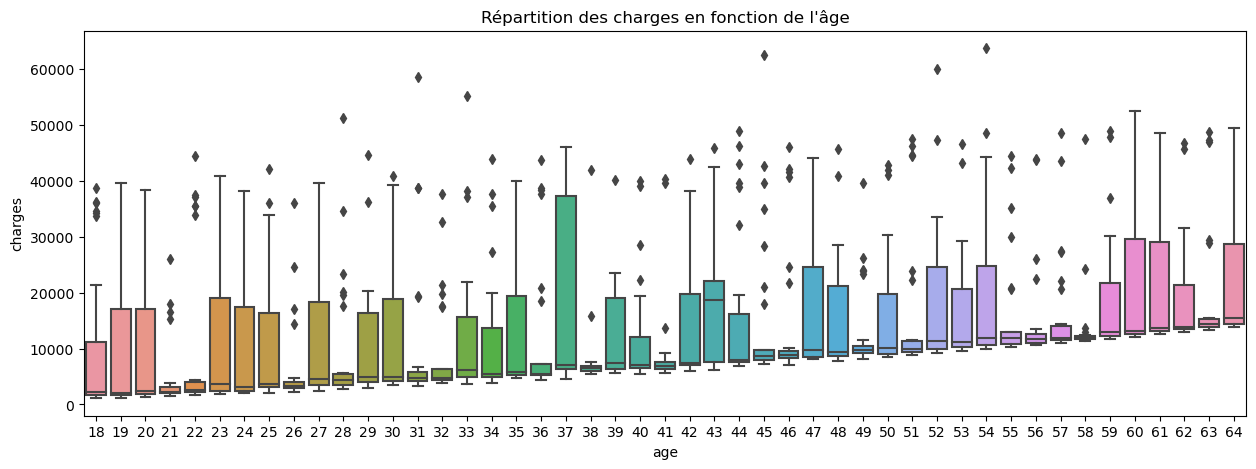

In [15]:
plt.figure(figsize=(15,5))

plt.title("Répartition des charges en fonction de l'âge")

sns.boxplot(x='age', y='charges', data=df_continues)

# Corrélation
data = df_continues[['age', 'charges']]
corr = corr = data.corr()
print(corr)

Le coefficient de corrélation de Pearson entre les variables 'âge' et 'charges' est de 0.299 : il y a une faible corrélation positive entre ces deux variables. Comme le montre le boxplot, les valeurs de 'charges' tendent à augmenter lorsque les valeurs d'âge augmentent. Cependant, la corrélation n'est pas forcément causale et ne peut pas être utilisée pour en déduire une relation causale entre les variables.<br>
On peut néanmoins supposer que les "trous" que l'on observe dans la tendance générale sont dûs à notre jeu de données limité, et que l'âge est un critère pris en compte pour le montant des "charges".

Et les charges en focntion du nombre d'enfants ?

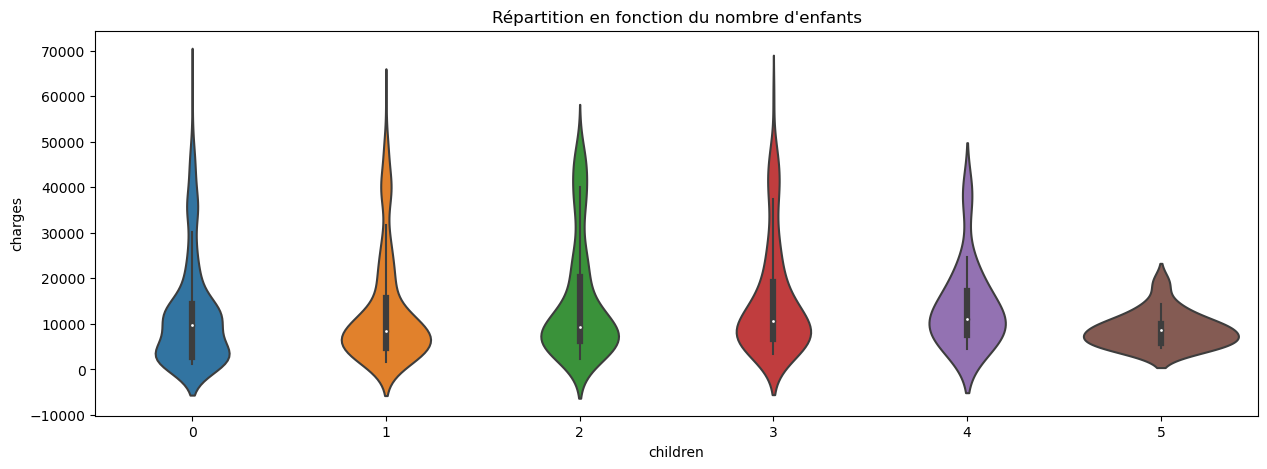

In [16]:
plt.figure(figsize=(15,5))

plt.title("Répartition en fonction du nombre d'enfants")

sns.violinplot(x='children', y='charges', data=dataset)

plt.show()


On remarque qu'au delà de 4 enfants, la répartiton des charges est plus ressérrée et l'amplitude beaucoup plus faible. Cela suggère 

Et le sexe influe-t-il sur le montant des "charges" ?

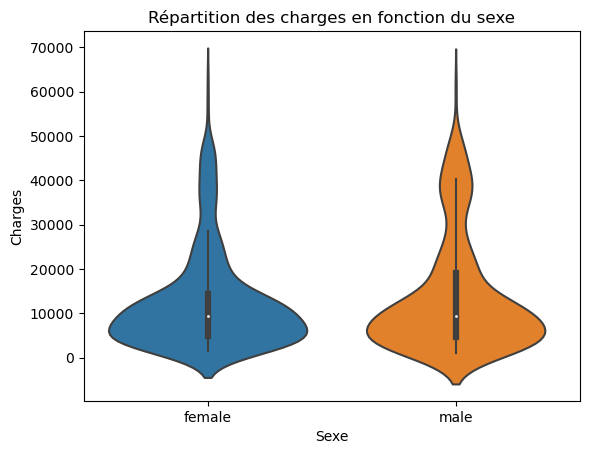

In [17]:
sns.violinplot(x='sex', y='charges', data=dataset)

plt.title('Répartition des charges en fonction du sexe')
plt.xlabel('Sexe')
plt.ylabel('Charges')

plt.show()

L'évolution des "charges" se répartissent sensiblement de la même manière selon le sexe, donc le sexe n'influe pas sur le montant des charges.

On regarde maintenant si la région a un impact sur les charges.

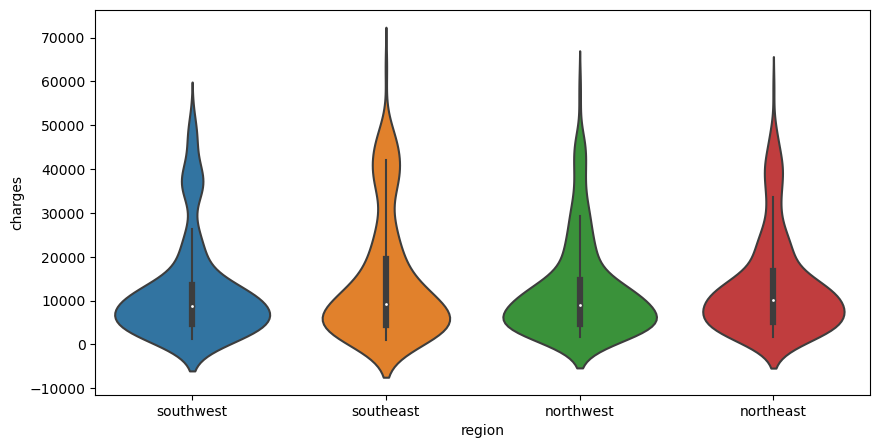

In [18]:
plt.figure(figsize=(10,5))
sns.violinplot(x='region', y='charges', data=dataset)

plt.show()

Les "charges" ne changent pas vraiment selon la région, donc la variable "region" n'est pas important pour expliquer la variable "charge"

# 4. Tests statistiques

On prépare un dataframe pour les tests

In [19]:
### On change les valeurs de la colonne region par des entiers

# liste des régions
liste_region = list(dataset['region'].unique())
dico = {}

# Boucle for avec reg (pour region) et i(indice correspondant)
for reg, i in zip(liste_region, range(len(liste_region))):
    # dans le dictionnaire, on associe la clé region à son indice 
    dico[reg]=i

# on copie le dataset initial pour ne pas le modifier
df = dataset.copy()

df['region'] = df['region'].apply(lambda x : dico[x])
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,0,16884.92400
1,18,male,33.770,1,no,1,1725.55230
2,28,male,33.000,3,no,1,4449.46200
3,33,male,22.705,0,no,2,21984.47061
4,32,male,28.880,0,no,2,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,2,10600.54830
1334,18,female,31.920,0,no,3,2205.98080
1335,18,female,36.850,0,no,1,1629.83350
1336,21,female,25.800,0,no,0,2007.94500


## 4.1. Test ANOVA à un facteur ("bmi" par rapport à "region")

In [20]:
# Sélection des données de la colonne "bmi" en fonction de la colonne "region"
data = [dataset[dataset['region'] == r]['bmi'] for r in dataset['region'].unique()]

# Test ANOVA
statistic, p_value = f_oneway(*data)

# Affichage du résultat
print(f"statistic = {statistic:.3f}, p_value = {p_value:.3f}")


statistic = 39.495, p_value = 0.000


## 4.2. Test de Kruskal-Wallis ("charges" par rapport à "region")

In [21]:
# Sélection des données de la colonne "charges" en fonction de la colonne "region"
data = [dataset[dataset['region'] == r]['charges'] for r in dataset['region'].unique()]

# Calcul du test de Kruskal-Wallis
stat, p_value = kruskal(*data)

# Affichage du résultat
print(f"statistic = {stat:.3f}, p_value = {p_value:.3f}")



statistic = 4.734, p_value = 0.192


Avec une statistic de 4.734 et une p-value de 0.192, il est peu probable qu'il y ait une différence significative de moyennes entre les groupes de données. Le p-value étant supérieur à 0.05 (seuil de signification), il indique que la différence de moyennes observée n'est pas statistiquement significative.

## 4.3. Test de Kruskal-Wallis ("charges" par rapport à "fumeurs")

On prépare un dataframe pour le test

In [22]:
# focntion pour changer les valeurs "yes" et "no" en "1" et "0" (smoker)
def binary_encode(x):
  if x == 'yes':
    return 1
  elif x == 'no':
    return 0
  else:
    raise ValueError("Invalid input for binary encoding")

In [23]:
# on utilise la copie (df) du dataset initial 

df['smoker'] = df['smoker'].apply(lambda x : binary_encode(x))
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,1,0,16884.92400
1,18,male,33.770,1,0,1,1725.55230
2,28,male,33.000,3,0,1,4449.46200
3,33,male,22.705,0,0,2,21984.47061
4,32,male,28.880,0,0,2,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,0,2,10600.54830
1334,18,female,31.920,0,0,3,2205.98080
1335,18,female,36.850,0,0,1,1629.83350
1336,21,female,25.800,0,0,0,2007.94500


In [24]:
# Sélection des données de la colonne "charges" en fonction de la colonne "smoker"
data = [dataset[dataset['smoker'] == r]['charges'] for r in dataset['smoker'].unique()]

# Calcul du test de Kruskal-Wallis
stat, p_value = kruskal(*data)

# Affichage du résultat
print(f"statistic = {stat:.3f}, p_value = {p_value:.3f}")


statistic = 588.520, p_value = 0.000


Les observations précédentes sont validées par ce test, il y a un lien significatif entre les variables étudiées.

## 4.4. Test de Kruskal-Wallis ("charges" par rapport à "children")

In [25]:
# Sélection des données de la colonne "charges" en fonction de la colonne "children"
data = [dataset[dataset['children'] == r]['charges'] for r in dataset['children'].unique()]

# Calcul du test de Kruskal-Wallis
stat, p_value = kruskal(*data)

# Affichage du résultat
print(f"statistic = {stat:.3f}, p_value = {p_value:.3f}")


statistic = 29.487, p_value = 0.000


Ainsi, le nombre d'enfants influe sur le montant des "charges".